In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Random Variable

If a trial or an experiment is conducted then the set of all possible outcomes is called as **sample space**.

Random Variable is a real valued function defined over the sample space of an experiment. A variable whose value is determined by the outcome of an experiment associated with a sample space is called **random variable**. It is denoted by capital letter $X$ or $Y$. 

The outcomes are denoted by $x$.For a die throw experiment, 
$$ x = 1, x = 2, x = 3, x = 4, x = 5, x = 6$$

### 1. Discrete Random Variable
A **discrete random variable** has a finite number of values or an infinite sequence of values $(0, 1, 2, ..)$ AND the differneces between the outcomes are meaningful.
### 2. Continuous Random Variable
A **continous random variable** has a nearly infinite number of outcomes that cannot be easily counted  AND the differneces between the outcomes are NOT meaningful.

**Distribution** : The possible values a variable can take and how frequently they occur.

The probability of random variable X having value x is often represented as $P(X=x)$.

Lets take example of event of throwing a dice twice. Take random variable as sum of the results of each throw and calculate the probability.

In [2]:
sums = list(range(2, 13))
freq = list(range(1,7)) + list(range(5, 0, -1))
df = pd.DataFrame({'Sum': sums, 'Frequency': freq})
df

,Sum,Frequency
0,2,1
1,3,2
2,4,3
3,5,4
4,6,5
5,7,6
6,8,5
7,9,4
8,10,3
9,11,2


In [3]:
df.rename(columns={"Sum": "x","Frequency": "P(X=x)"}, inplace=True)
df["P(X=x)"] = df["P(X=x)"].apply(lambda x: x / 36)
df

,x,P(X=x)
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


This is a **probability distribution** for our discrete random variable. Generally distributions are defined using two characteristics **mean** and **variance**.

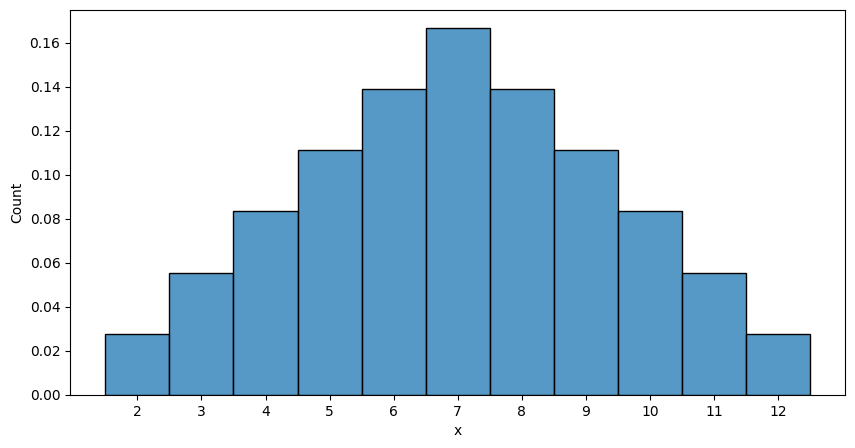

In [4]:
plt.figure(figsize=(10, 5))
pmf = sns.histplot(data=df, x="x", weights="P(X=x)", discrete=True)
pmf.set_xticks(sums)
plt.show()

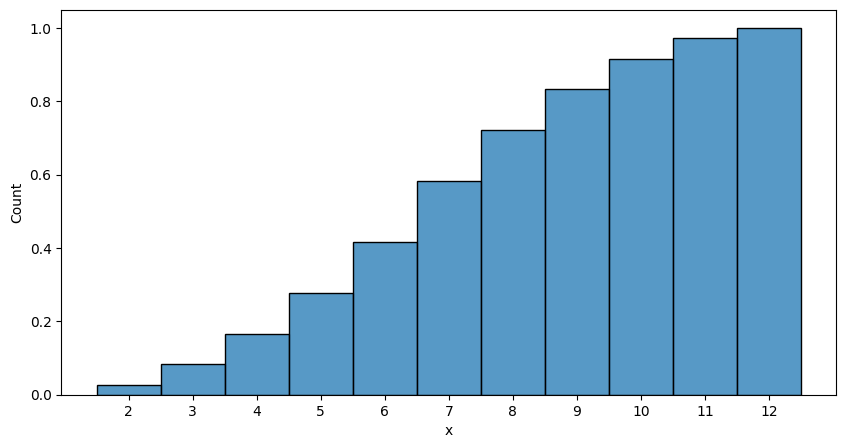

In [5]:
plt.figure(figsize=(10, 5))
cdf = sns.histplot(data=df, x="x", weights="P(X=x)", discrete=True, cumulative=True)
cdf.set_xticks(sums)
plt.show()

## Mathematical Expectation 
Mathematical expectation is the average expected outcome i.e. mean of a random variable.

If X is a random variable with all possible values $x_{1}, x_{2}, x_{3} ...., x_{n}$ and probability functions(probabilities)$ p(x_{1}), p(x_{2}), ..., p(x_{n})$, then the mathematical expectation of X is denoted by $E(X)$ and given by,
$$ E(X) = \sum_{i=1}^{n} x_{i} \times P(x_{i}) $$

**E(X) is the arithmatic mean $\mu$ of random variable X:**
Arithmatic mean in frequency distribution,
$$ \bar x = \dfrac{\sum f_{i} x_{i}}{\sum f} = \dfrac{1}{\sum f}(f_{1} x_{1} + f_{2} x_{2} + ..... + f_{n} x_{n}) $$
$$ \therefore \bar x = \sum_{i=1}^{n} P_{i} x_{i} = E(x) = \mu $$

**Variance $Var(X) = \sigma^{2}$ of a random variable X:**
$$ Var(X) = \mu^2 = E[X - E(X)]^2 $$
$$ \therefore \sigma^2 = E(x - \mu)^2 = \sum_{i=1}^{n}(x_i - \mu)^2 P_i $$
$$ \therefore \sigma^2 = \sum_{i=1}^{n}x_i^2P_i - 2\mu\sum_{i=1}^{n}x_iP_i + \mu^2\sum_{i=1}^{n}P_i $$
$$ \therefore \sigma^2 = E(x^2) - 2\mu^2+ \mu^2 = E(x^2) - \mu^2 $$
$$ \sigma^2 = E(x^2) - [E(x)]^2 $$

In [6]:
from scipy import stats

# Probability (Statistical) Distributions

The distribution provides a parameterized mathematical function that can be used to calculate the probability for any individual observation from the sample space. This distribution describes the grouping or the density of the observations, called the probability density function. We can also calculate the likelihood of an observation having a value equal to or lesser than a given value. A summary of these relationships between observations is called a cumulative density function.

> A **distribution** is simply a collection of data, or scores, on a variable. Usually, these scores are arranged in order from smallest to largest and then they can be presented graphically.

### Density Functions
Density functions are functions that describe how the proportion of data or **likelihood** of the proportion of observations change over the range of the distribution.

Two types of density functions are probability density functions and cumulative density functions.
- **Probability Density function**: calculates the probability of observing a given value.
- **Cumulative Density function**: calculates the probability of an observation equal or less than a value.

[Probability VS Likelihood](https://youtu.be/pYxNSUDSFH4)

### Notation

X   ~  N ($\mu$, $\sigma^2$) <br>
variable, tilde, type, characteristics

In probability theory, **a probability density function**, or density of a continuous random variable, is a function whose value at any given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would be equal to that sample.

In probability and statistics, a **probability mass function** is a function that gives the probability that a discrete random variable is exactly equal to some value. Sometimes it is also known as the discrete density function. 

## Discrete Distributions

- ### Uniform Discrete Distribution
https://en.wikipedia.org/wiki/Discrete_uniform_distribution

    $X \sim U(a,b)$ : where $a$ and $b$ where a and b represent the starting and ending values.
    
    Similar to a discrete uniform distribution, there is a continuous uniform distribution for continuous variables.

    **In uniform distribution, all outcomes have equal probability.**<br>
    eg. Rolling a dice
    
    The probability mass function of a uniform discrete distribution is
    $$ f(x) = \dfrac{1}{high - low} $$
    for $x \in \{low,......., high - 1\}$
    
    The drawbacks of this distribution are that it often provides us with no relevant information. Using our example of a rolling die, we get the expected value of 3.5, which gives us no accurate intuition since there is no such thing as half a number on a dice. Since all values are equally likely, it gives us no real predictive power.
    
    **For a dice roll,**

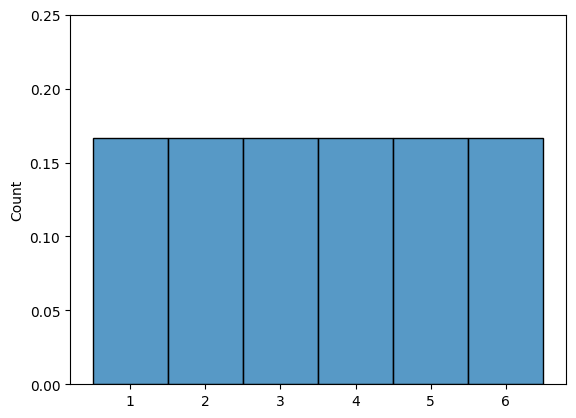

In [7]:
low, high = 1, 7
x = np.arange(low, high) #np.arange(stats.randint.ppf(0.01, low, high), stats.randint.ppf(0.99, low, high))
pmf = stats.randint.pmf(x, low, high)
plot = sns.histplot(x=x, weights=pmf, discrete=True)
plot.set_ylim(0, 0.25)
plot.set_xticks(x)
plt.show()

- ### Bernoulli Distribution
https://en.wikipedia.org/wiki/Bernoulli_distribution

$ X \sim Bern(p) $ : Variable X follows a bernoulli distribution where probability of success is $p$

Any event with a single trial and only two possible outcomes follow a Bernoulli distribution. Flipping a coin or choosing between True and False in a quiz are examples of a Bernoulli distribution. 
Conventionally, we assign $p$ to outcome 1

The probability mass function for Bernoulli Distribution is:
$$
f(x) = 
\begin{cases}
    1-p &  \text{if k = 0}\\
    p &  \text{if k = 1}
\end{cases}
$$

**Expected Value**:
$$ E(X) = \mu = 1 \cdot p + 0 \cdot (1-p) $$
$$ E(X) = p $$
**Variance**: 
$$ \sigma^2 = E(x^2) - [E(x)]^2 = 1^2 \cdot p + 0^2 \cdot (1-p) - p^2 $$
$$ \sigma^2 = p(1-p) $$

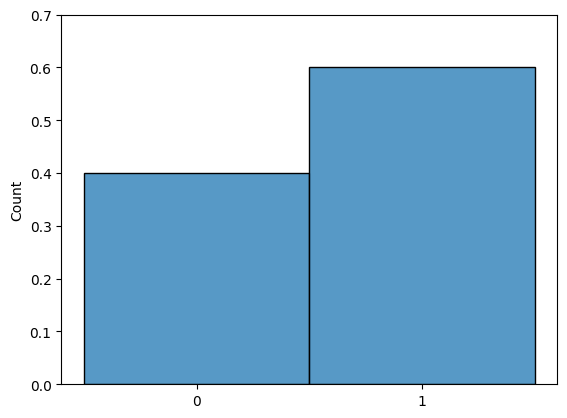

In [8]:
p = 0.6
x = [0,1] #np.arange(stats.bernoulli.ppf(0.01, p),stats.bernoulli.ppf(0.99, p))
pmf = stats.bernoulli.pmf(x, p)
plot = sns.histplot(x=x, weights=pmf, discrete=True)
plot.set_ylim(0, 0.7)
plot.set_xticks(x)
plt.show()

In [9]:
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
mean, var

(0.6, 0.24)

- ### Binomial Distribution
https://en.wikipedia.org/wiki/Binomial_distribution

$ X \sim B(n, p) $ : Variable X follows a binomial distribution with $n$ trials probability of success is $p$

> $ Bern(p) = B(1, p) $

The Binomial Distribution can be thought of as the sum of outcomes of an event following a Bernoulli distribution. Therefore, Binomial Distribution is used in binary outcome events, and the probability of success and failure is the same in all successive trials. An example of a binomial event would be flipping a coin multiple times to count the number of heads and tails.
$$ p(desired \: outcome) = p $$

The probability mass function for Binomial Distribution is:
$$
f(x) = \binom{n}{x} p^x (1-p)^{n-x}
$$

**Expected Value**:
$$ E(X) = np $$
**Variance**: 
$$ \sigma^2 = np(1-p) $$

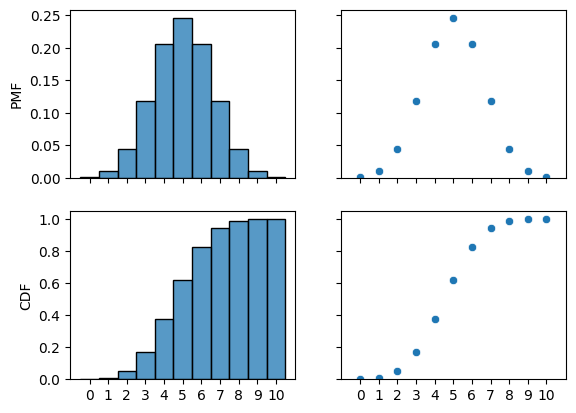

In [10]:
# coin thrown 10 times
n = 10
p = 0.5
x = list(range(0,11)) #np.arange(stats.binom.ppf(0.01, n, p),stats.binom.ppf(0.99,n, p))
pmf = stats.binom.pmf(x, n, p)
cdf = stats.binom.cdf(x, n, p)

fig, axs = plt.subplots(2, 2, sharex='all', sharey='row')
axs[0][0].set_ylabel("PMF")
axs[1][0].set_ylabel("CDF")
plot = sns.histplot(x=x, weights=pmf, discrete=True, ax=axs[0, 0])
plot.set_xticks(x)
sns.scatterplot(x=x, y=pmf, ax=axs[0,1])
sns.histplot(x=x, weights=cdf, discrete=True, ax=axs[1, 0])
sns.scatterplot(x=x, y=cdf, ax=axs[1,1])
plt.show()

In [11]:
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
mean, var

(5.0, 2.5)

- ### HyperGeometric Distribution
https://en.wikipedia.org/wiki/Hypergeometric_distribution

$ X \sim H(N, M, n) $

Hypergeometric distribution is a discrete probability distribution that describes the probability of **x successes** (random draws for which the object drawn has a specified feature) in **n draws**, without replacement, from a **finite population of size N** that contains exactly **M objects with that feature**, wherein each draw is either a success or a failure.

The probability mass function for Hypergeometric Distribution is:
$$
f(x) = \dfrac{\binom{M}{x}\binom{N-M}{n-x}}{\binom{N}{n}}
$$

**Expected Value**:
$$ E(X) = n\dfrac{M}{N} $$
**Variance**: 
$$ \sigma^2 = n\dfrac{M}{N}\dfrac{N-M}{N}\dfrac{N-n}{N-1} $$

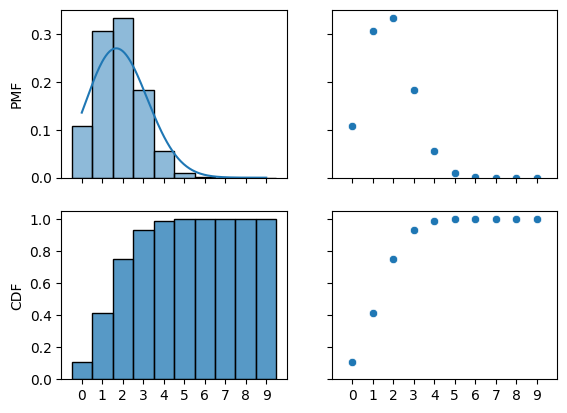

In [12]:
# drawing a red ball from 50 balls out of which 10 are red without replacement (ball drawn = 9)
N = 50
M = 10
n = 9
x = list(range(0, 10))
pmf = stats.hypergeom.pmf(x, N, M, n)
cdf = stats.hypergeom.cdf(x, N, M, n)

fig, axs = plt.subplots(2, 2, sharex='all', sharey='row')
axs[0][0].set_ylabel("PMF")
axs[1][0].set_ylabel("CDF")
plot = sns.histplot(x=x, weights=pmf, discrete=True, ax=axs[0, 0], kde=True)
plot.set_xticks(x)
sns.scatterplot(x=x, y=pmf, ax=axs[0,1])
sns.histplot(x=x, weights=cdf, discrete=True, ax=axs[1, 0])
sns.scatterplot(x=x, y=cdf, ax=axs[1,1])
plt.show()

In [13]:
mean, var = stats.hypergeom.stats(N, M, n, moments='mv')
mean, var

(1.8, 1.2048979591836735)

- ### Poisson Distribution
https://en.wikipedia.org/wiki/Poisson_distribution

$ X \sim P_0(\lambda) $ : Variable X follows a Poisson distribution with $\lambda$

Poisson distribution deals with the frequency with which an event occurs within a specific interval. Instead of the probability of an event, Poisson distribution requires knowing how often it happens in a particular period or distance. For example, a cricket chirps two times in 7 seconds on average. We can use the Poisson distribution to determine the likelihood of it chirping five times in 15 seconds.

The probability mass function for Poission Distribution is:
$$
f(x) = e^{-\lambda}\dfrac{\lambda^x}{x!}
$$

**Expected Value**:
$$ E(X) = \lambda $$
**Variance**: 
$$ \sigma^2 = \lambda $$

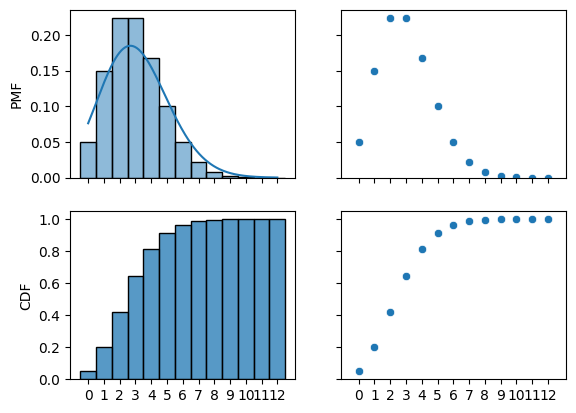

In [14]:
lambd = 3
x = np.arange(0, 13)
pmf = stats.poisson.pmf(x, lambd)
cdf = stats.poisson.cdf(x, lambd)

fig, axs = plt.subplots(2, 2, sharex='all', sharey='row')
axs[0][0].set_ylabel("PMF")
axs[1][0].set_ylabel("CDF")
plot = sns.histplot(x=x, weights=pmf, discrete=True, ax=axs[0, 0], kde=True)
plot.set_xticks(x)
sns.scatterplot(x=x, y=pmf, ax=axs[0,1])
sns.histplot(x=x, weights=cdf, discrete=True, ax=axs[1, 0])
sns.scatterplot(x=x, y=cdf, ax=axs[1,1])
plt.show()

In [15]:
mean, var = stats.poisson.stats(lambd, moments='mv')
mean, var

(3.0, 3.0)

## Continuous Distributions

- Gaussian / Normal Distribution
- Standard Normal Distribution
- Students' t distribution
- Chi Sqaured distribution
- exponential distribution
- paretto (power)
- log normal
- logistic